In [2]:
####Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
####Draw the inferences from the clusters obtained.

In [8]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns

In [29]:
airline=pd.read_excel("C:/Users/Vijay Rathod/Downloads/EastWestAirlines.xlsx",sheet_name='data')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [11]:
### Normalization of data
def norm_func():
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [25]:
## Our normalized data
airlines_norm = norm_func(airline.iloc[:,1:])
airlines_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [27]:
airlines_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Balance            3999 non-null   float64
 1   Qual_miles         3999 non-null   float64
 2   cc1_miles          3999 non-null   float64
 3   cc2_miles          3999 non-null   float64
 4   cc3_miles          3999 non-null   float64
 5   Bonus_miles        3999 non-null   float64
 6   Bonus_trans        3999 non-null   float64
 7   Flight_miles_12mo  3999 non-null   float64
 8   Flight_trans_12    3999 non-null   float64
 9   Days_since_enroll  3999 non-null   float64
 10  Award?             3999 non-null   float64
dtypes: float64(11)
memory usage: 343.8 KB


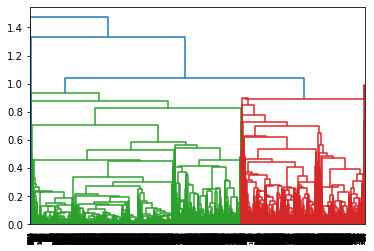

In [32]:
# creating dendrogram
dendrogram = sch.dendrogram(sch.linkage(airlines_norm, method='centroid'))

In [46]:
### Creating Clusters
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [47]:
### Saving Clusters
y_hc=hc.fit_predict(airlines_norm)
clusters=pd.DataFrame(y_hc,columns=['clusters'])

In [43]:
clusters

,clusters
0,0
1,0
2,0
3,0
4,1
...,...
3994,2
3995,2
3996,2
3997,0


In [54]:
airlines_norm['h_clustersid']= hc.labels_

In [55]:
hc.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [56]:
###getting mean
airlines_norm.groupby('h_clustersid').agg(['mean']).reset_index()

,h_clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clustesid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.035175,0.007973,0.178056,0.000200,0.002806,0.038954,0.105882,0.007392,0.012379,0.460983,0.000802,0.0
1,1,0.092140,0.018719,0.915385,0.000000,0.015385,0.267278,0.270340,0.033080,0.060319,0.695511,1.000000,1.0
2,2,0.047027,0.022296,0.276224,0.004808,0.000219,0.064027,0.155960,0.024011,0.042205,0.518734,1.000000,2.0
3,3,0.077426,0.031127,0.375000,0.000000,0.000000,0.248912,0.805233,0.647694,0.929245,0.265041,1.000000,3.0
4,4,0.026698,0.002894,0.000000,0.741935,0.000000,0.055441,0.187547,0.014383,0.037127,0.456023,0.193548,4.0


In [ ]:
####inferences : The Data is large here, it has 3999 observations, hence it was  difficult to do the Clustring by Hierarchical method. By Hierarchical Clustering method we have formed 5 clusters of the whole data set.

In [ ]:
#### K-Means Clustering

In [60]:
from sklearn.cluster import KMeans

In [83]:
airlineK=pd.read_excel("C:/Users/Vijay Rathod/Downloads/EastWestAirlines.xlsx",sheet_name='data')
airlineK

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [64]:
#### Nlormalization of data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler_airline=scaler.fit_transform(airlineK.iloc[:,1:])

In [65]:
scaler_airline

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [68]:
### Finding Optimum Number of Clusters
wcss=[]
for i in range (1,11):
    kmean=KMeans(n_clusters=i,random_state=0)
    kmean.fit(scaler_airline)
    wcss.append(kmean.inertia_)

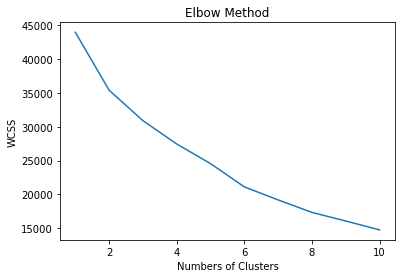

In [69]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Numbers of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
### Looking at the Elbow plot we understand that at no. of clusters 7 the kline has stopped dropping drastically hence the optimum no. of clusters would be 7 here for Airline data set.

In [70]:
####  Building cluster Algorithm
airline_df=KMeans(7,random_state=42)
airline_df.fit(scaler_airline)

KMeans(n_clusters=7, random_state=42)

In [71]:
airline_df.labels_

array([0, 0, 0, ..., 1, 6, 6])

In [75]:
#### Assing the clusters to data
airlineK['clusterid']=airline_df.labels_

In [76]:
airlineK

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,6
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,6
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,6


In [79]:
#### Taking Agg mean
airlineK.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1096.916321,59320.541011,62.133389,1.366197,1.000000,1.000829,6050.733223,8.142502,252.827672,0.791218,5741.470588,0.294946
1,1,1656.441882,120856.216790,57.110701,3.881919,1.000000,1.001845,42800.992620,19.236162,358.779520,1.062731,4785.694649,0.690959
2,2,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,4,1755.788732,188719.176056,467.845070,2.253521,1.000000,1.000000,33183.098592,28.140845,5735.267606,16.633803,4664.007042,0.802817
5,5,2083.603448,118527.293103,5486.241379,2.051724,1.000000,1.000000,19386.500000,12.500000,980.724138,2.913793,3928.534483,0.551724
6,6,3065.500000,36564.384138,36.271034,1.268276,1.000000,1.000000,4817.745517,6.772414,166.717241,0.507586,2222.382759,0.141379


In [ ]:
####By K-Means Clustering method we have formed 7 clusters of the whole data set identifying the optimum no. of clusters with the help of within-cluster sum-of-squares criterion

In [ ]:
##### DBSCANE

In [81]:
from sklearn.cluster import DBSCAN

In [87]:
airline_dbscan=pd.read_excel("C:/Users/Vijay Rathod/Downloads/EastWestAirlines.xlsx",sheet_name='data')
print(airline_dbscan)

       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_m

In [ ]:
#### Droping unwanted column

In [88]:
airline_dbscan.drop(['ID#'],axis=1,inplace=True)

In [91]:
##### Normlization of data
array=airline_dbscan.values
stdscaler=StandardScaler().fit(array)
x=stdscaler.transform(array)

In [ ]:
#####  DBSCAN

In [96]:
dbscan=DBSCAN(eps=0.9,min_samples=12)
dbscan.fit(x)

DBSCAN(eps=0.9, min_samples=12)

In [98]:
#### Noisy sample are labeled as -1
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
##### Adding Clusters


In [100]:
df1=pd.DataFrame(dbscan.labels_,columns=['clusters'])

In [104]:
Airline=pd.concat([airline_dbscan,df1],axis=1)

In [106]:
Airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
